# Write here the problem you are solving

## Importing the Basic Libraries

In [1]:
#import the basic libraries
#pandas, numpy, sklearn, matplotlib, seaborn, scipy

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import re

## Configuring Default API Parameters

In [15]:
#if required, configure here the in-built parameters of the above libraries
#for instance, floating point precision display with pandas
#or matplotlib.pyplot settings (area etc.)
%matplotlib inline
np.random.seed(8)
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams['font.size'] = 30
sns.set()

## Importing the Data

In [3]:
#import the data (typically pandas dataframe or numpy array)
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\old.campaign.csv')

## Birds Eye View

In [4]:
#do the following for initial birds eye view
#head, tail, shape, columns, column types
df.shape

(1000, 12)

In [5]:
# columns
df.columns

Index(['Name', 'Age', 'Gender', 'Area', 'Email', 'Mobile', 'Logins 4 weeks',
       'Logins 6 months', 'Sales 4 weeks', 'Sales 6 months', 'Sales total',
       'Response'],
      dtype='object')

In [6]:
# Types
df.dtypes

Name               object
Age                 int64
Gender             object
Area               object
Email              object
Mobile             object
Logins 4 weeks      int64
Logins 6 months     int64
Sales 4 weeks       int64
Sales 6 months      int64
Sales total         int64
Response           object
dtype: object

In [7]:
df.head()

,Name,Age,Gender,Area,Email,Mobile,Logins 4 weeks,Logins 6 months,Sales 4 weeks,Sales 6 months,Sales total,Response
0,COX,64,female,urban,free,never,1,1,0,0,0,no
1,FARLEY,49,male,urban,premium,never,0,4,0,0,0,yes
2,HYDE,63,male,urban,free,never,0,0,0,0,0,no
3,SANTIAGO,75,male,urban,premium,yes,0,0,0,0,0,yes
4,COPELAND,37,female,urban,free,yes,0,0,0,0,62,no


In [8]:
df.tail()

,Name,Age,Gender,Area,Email,Mobile,Logins 4 weeks,Logins 6 months,Sales 4 weeks,Sales 6 months,Sales total,Response
995,VANCE,24,male,urban,free,yes,0,0,0,0,0,yes
996,REYES,40,female,urban,premium,yes,0,9,0,183,411,yes
997,COHEN,27,female,urban,free,never,0,0,0,0,0,no
998,STOUT,40,female,urban,premium,yes,0,0,0,0,0,yes
999,COOLEY,45,female,urban,free,never,0,3,0,66,66,no


## Analysis (Birds Eye View)

#### write down what you have understood from above and justify your strategy

The data has some anomalies, for instance, it has a lot of outliers such as Age=543. There are also lots of null values that need to be replaced by the mean of those values. By superficially looking at the data we can identify that most of the people in the dataset are from the United States and its neighbouring countries. The dataset may have spelling mistakes as well for instance the word Wife is mispelled as Wif. 



## Drilling the Categorical Variables (Dimensions)

### Workclass:

draw frequency bar graphs of categorical variables

for high cardinality, draw horizontal bar graph

for low cardinality, draw vertical bar graph

deal with high cardinality (which generates too many columns in 1-hot encoding)
dealing with high cardinality is a business decision, e.g., we can ask the business to allow us to remove low-frequency values (e.g., products with very limited sales or customers who visited us only once)
we should try to lower the cardinality through change of discretization (e.g., from 20 unique values to 10 unique values)

deal with outliers (very low frequency)

delete columns with only one value (e.g., if Product_Name col has only "Redmi 4" as value, then the column will be deleted and in problem statement, we will say that this analysis is for Redmi4)

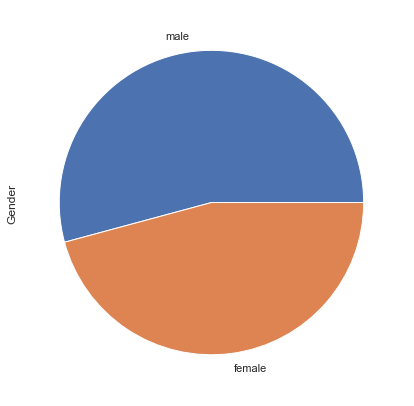

In [16]:
# Frequency of Genders 
df['Gender'].value_counts().plot.pie()

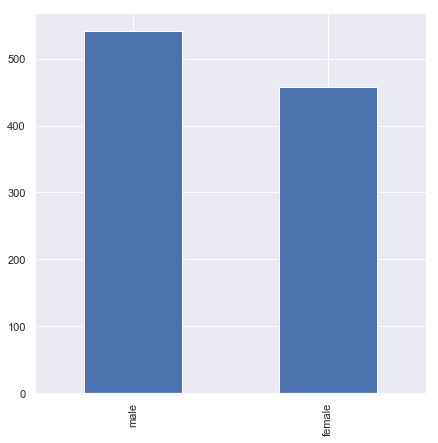

In [17]:
# Low Cardinality vertical bar chart
df['Gender'].value_counts().plot.bar()

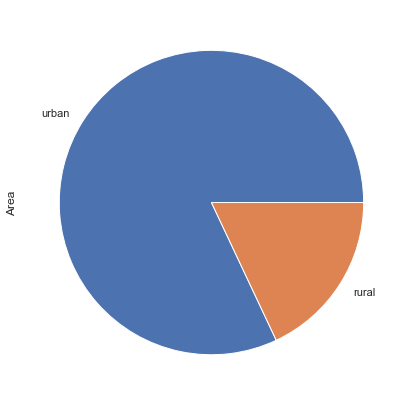

In [18]:
# Frequency of individuals by Area 
df['Area'].value_counts().plot.pie()

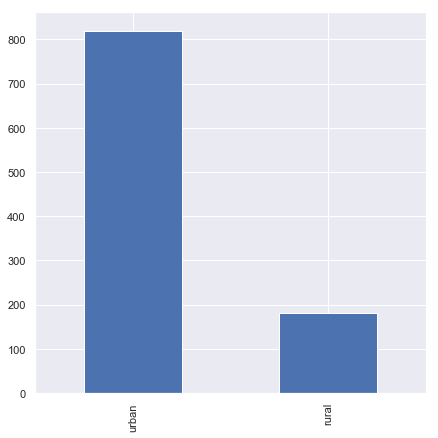

In [19]:
# Low Cardinality vertical bar chart
df['Area'].value_counts().plot.bar()

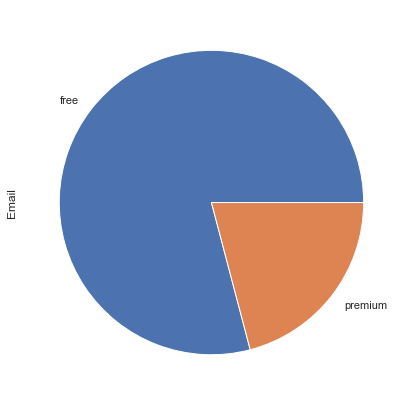

In [21]:
# Frequency of individuals by Area 
df['Email'].value_counts().plot.pie()

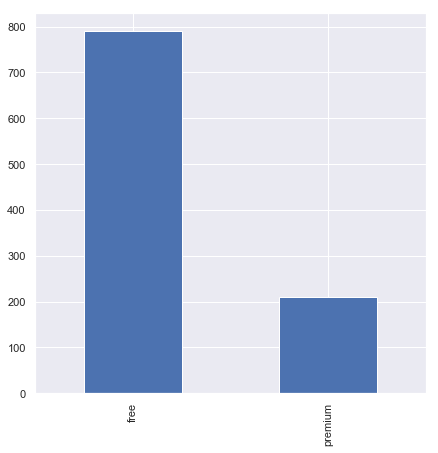

In [22]:
# Low Cardinality vertical bar chart
df['Email'].value_counts().plot.bar()

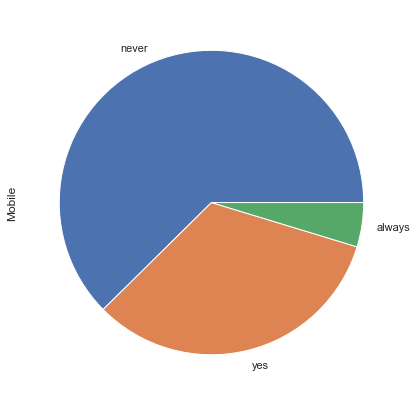

In [23]:
# Frequency of individuals by Area 
df['Mobile'].value_counts().plot.pie()

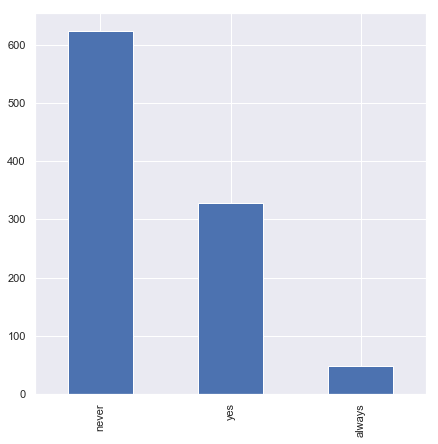

In [24]:
# Low Cardinality vertical bar chart
df['Mobile'].value_counts().plot.bar()

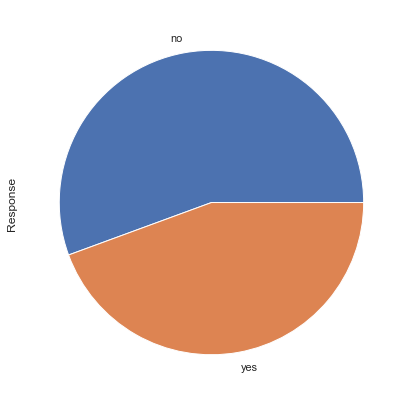

In [25]:
# Frequency of individuals by Area 
df['Response'].value_counts().plot.pie()

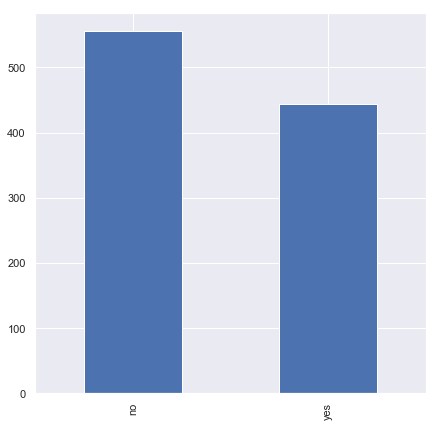

In [26]:
# Low Cardinality vertical bar chart
df['Response'].value_counts().plot.bar()

## EDA Categorical (Output)

## Drilling Numerical Variables (Includes Facts/KPIs)

draw histograms and boxplots of all the numerical variables
identify skews and outliers and deal with them (it may not be feasible to take the outliers into machine learninh models unless they are part of class label)
dealing with outliers is a business decision

## Age:

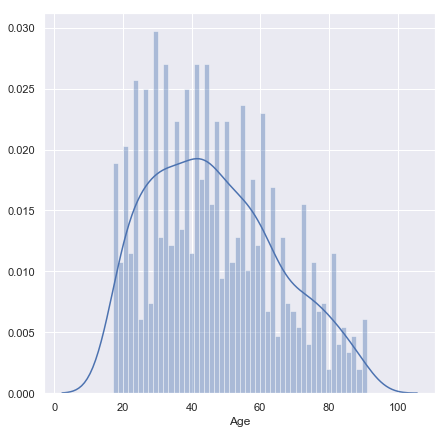

In [27]:
# Histogram:
sns.distplot(df['Age'],bins=50)

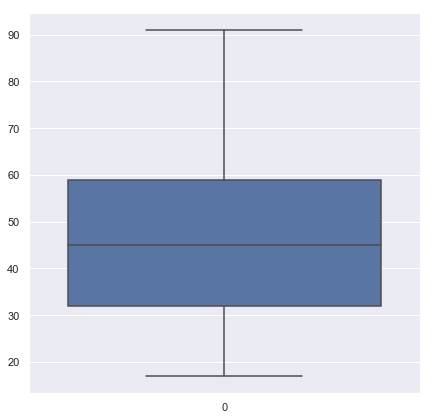

In [28]:
# Box plots
sns.boxplot(data = df['Age']) 

## Logins 4 weeks:

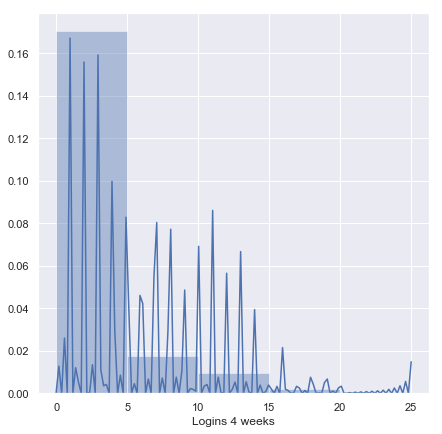

In [35]:
# Histogram:
sns.distplot(df['Logins 4 weeks'],bins=5)

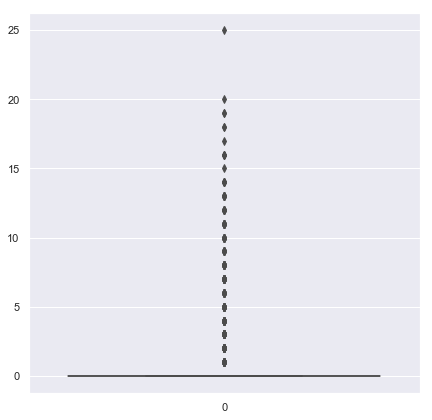

In [36]:
# Box plots
sns.boxplot(data = df['Logins 4 weeks']) 

## Logins 6 months

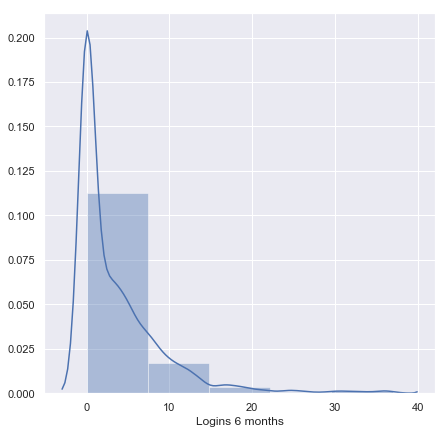

In [38]:
# Histogram:
sns.distplot(df['Logins 6 months'],bins=5)

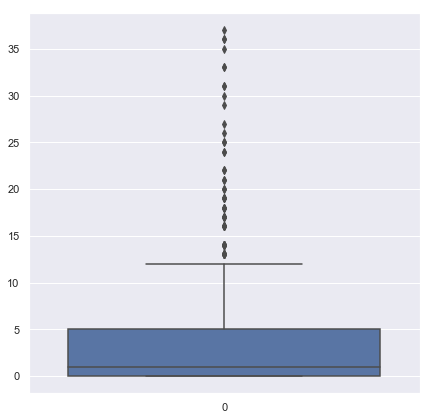

In [39]:
# Box plots
sns.boxplot(data = df['Logins 6 months']) 

## Sales 4 weeks:

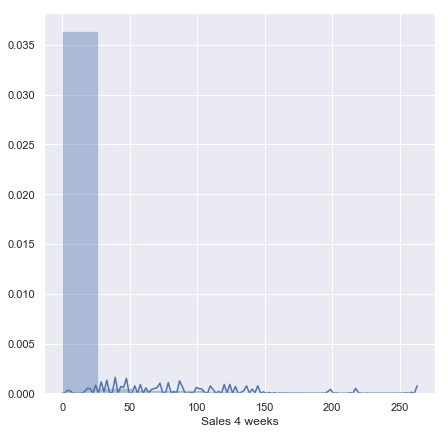

In [40]:
# Histogram:
sns.distplot(df['Sales 4 weeks'],bins=10)

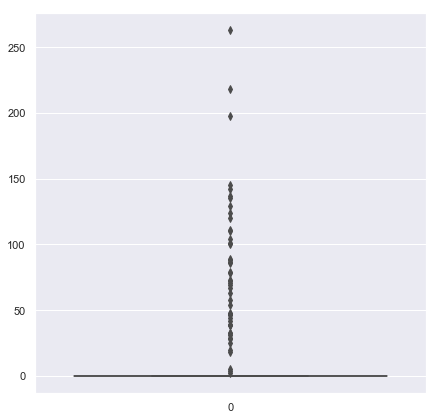

In [42]:
# Box plots
sns.boxplot(data = df['Sales 4 weeks']) 

## Sales 6 months:

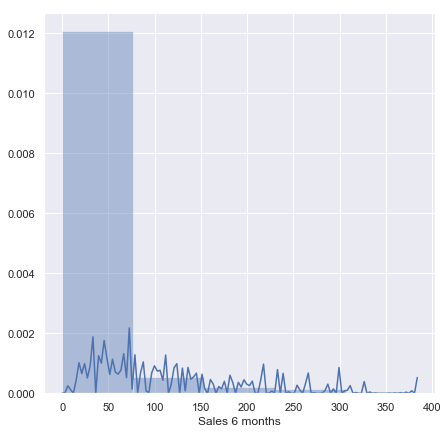

In [45]:
# Histogram:
sns.distplot(df['Sales 6 months'],bins=5)

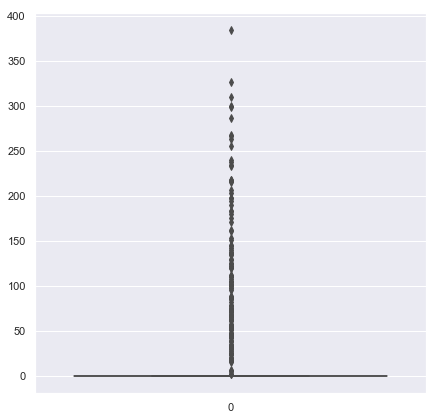

In [46]:
# Box plots
sns.boxplot(data = df['Sales 6 months']) 

## Sales Total

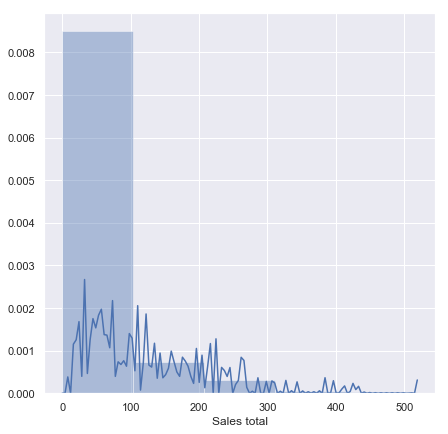

In [49]:
# Histogram:
sns.distplot(df['Sales total'],bins=5)

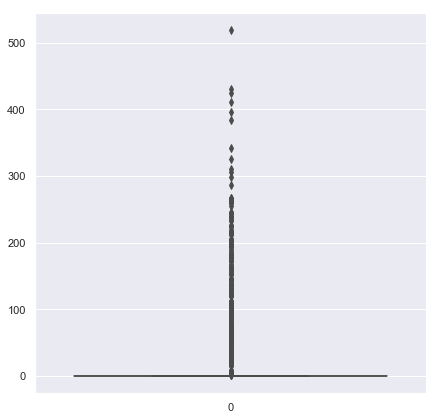

In [48]:
# Box plots
sns.boxplot(data = df['Sales total']) 

## EDA Numerical (Output)

In [79]:
# write down what you have understood from above (for each column)
# interpretation of each graph
# why you took the decisons you took? (data governance policy)
# your analyses




## 1-way Anova Tests

In [50]:
#conduct 1-way Anova (done between a categorical variable and numerical variable to check whether the latter's mean is different across the groups in former variable)
# remember that the selection of variables should make logical sense for the business and should have some impact on the future business strategy
# do not do 1-way anova of each combination of numerical variable (illogical)
df.rename(columns={"Sales total":"SalesTotal"}, inplace=True)
df.rename(columns={"Logins 4 weeks":"l4w"}, inplace=True)
df.rename(columns={"Logins 6 months":"l6m"}, inplace=True)
df.rename(columns={"Sales 4 weeks":"s4w"}, inplace=True)
df.rename(columns={"Sales 6 months":"s6m"}, inplace=True)

In [51]:
mod = ols('SalesTotal ~ Gender',data=df).fit()
sm.stats.anova_lm(mod, typ= 2)

,sum_sq,df,F,PR(>F)
Gender,3.890321e+00,1.0,0.000828,0.977047
Residual,4.687996e+06,998.0,NaN,NaN


In [52]:
mod = ols('SalesTotal ~ Area',data=df).fit()
sm.stats.anova_lm(mod, typ= 2)

,sum_sq,df,F,PR(>F)
Area,3.197994e+03,1.0,0.681266,0.409348
Residual,4.684802e+06,998.0,NaN,NaN


In [53]:
mod = ols('SalesTotal ~ Email',data=df).fit()
sm.stats.anova_lm(mod, typ= 2)

,sum_sq,df,F,PR(>F)
Email,4.971721e+03,1.0,1.059523,0.303573
Residual,4.683028e+06,998.0,NaN,NaN


In [54]:
mod = ols('SalesTotal ~ Email',data=df).fit()
sm.stats.anova_lm(mod, typ= 2)

,sum_sq,df,F,PR(>F)
Email,4.971721e+03,1.0,1.059523,0.303573
Residual,4.683028e+06,998.0,NaN,NaN


In [61]:
mod = ols('l4w ~ Gender',data=df).fit()
sm.stats.anova_lm(mod, typ= 2)

,sum_sq,df,F,PR(>F)
Gender,3.233169,1.0,0.251349,0.616237
Residual,12837.541831,998.0,NaN,NaN


In [60]:
mod = ols('l4w ~ Area',data=df).fit()
sm.stats.anova_lm(mod, typ= 2)

,sum_sq,df,F,PR(>F)
Area,29.244512,1.0,2.278106,0.131529
Residual,12811.530488,998.0,NaN,NaN


In [59]:
mod = ols('l4w ~ Email',data=df).fit()
sm.stats.anova_lm(mod, typ= 2)

,sum_sq,df,F,PR(>F)
Email,1.845077,1.0,0.143422,0.704983
Residual,12838.929923,998.0,NaN,NaN


In [58]:
mod = ols('l4w ~ Email',data=df).fit()
sm.stats.anova_lm(mod, typ= 2)

,sum_sq,df,F,PR(>F)
Email,1.845077,1.0,0.143422,0.704983
Residual,12838.929923,998.0,NaN,NaN


## Analysis of 1-way Anova Results

#write down the conclusions from all 1-way Anova Results

I checked whether gender or age of a person has an effect on weight of the same person 
I also wanted to check if education years affect the salary per annum of a person

If p-value is less than α, reject the null hypothesis which states that mean of 2 columns are equal


## 2-way Anova Tests

In [62]:
#conduct 2-way Anova (done between 2 categorical variables and numerical variable to check whether the latter's mean is different across the groups in combination of the string variables)
# remember that the selection of variables should make logical sense for the business and should have some impact on the future business strategy
# do not do 2-way anova of each combination of numerical variable (illogical)

model = ols('SalesTotal ~ C(Gender)*C(Email)', df).fit()
sm.stats.anova_lm(model, typ= 2)

,sum_sq,df,F,PR(>F)
C(Gender),1.832010e-02,1.0,0.000004,0.998424
C(Email),4.967849e+03,1.0,1.059045,0.303683
C(Gender):C(Email),1.091416e+04,1.0,2.326677,0.127491
Residual,4.672114e+06,996.0,NaN,NaN


In [63]:
model = ols('SalesTotal ~ C(Gender)*C(Mobile)', df).fit()
sm.stats.anova_lm(model, typ= 2)

,sum_sq,df,F,PR(>F)
C(Gender),2.447861e+01,1.0,0.005224,0.942397
C(Mobile),1.269267e+04,2.0,1.354335,0.258595
C(Gender):C(Mobile),1.747777e+04,2.0,1.864916,0.155451
Residual,4.657825e+06,994.0,NaN,NaN


In [64]:
model = ols('SalesTotal ~ C(Gender)*C(Area)', df).fit()
sm.stats.anova_lm(model, typ= 2)

,sum_sq,df,F,PR(>F)
C(Gender),1.987867e+00,1.0,0.000423,0.983601
C(Area),3.196092e+03,1.0,0.679658,0.409902
C(Gender):C(Area),1.108318e+03,1.0,0.235687,0.627446
Residual,4.683691e+06,996.0,NaN,NaN


In [65]:
model = ols('SalesTotal ~ C(Email)*C(Area)', df).fit()
sm.stats.anova_lm(model, typ= 2)

,sum_sq,df,F,PR(>F)
C(Email),4.991169e+03,1.0,1.063792,0.302602
C(Area),3.217443e+03,1.0,0.685749,0.407812
C(Email):C(Area),6.711252e+03,1.0,1.430401,0.231984
Residual,4.673099e+06,996.0,NaN,NaN


## Analysis of 2-way Anova Results

#write down the conclusions from all 2-way Anova Results

#I carried out analysis to check whether 
If p-value is less than α, reject the null hypothesis which states that mean of 2 columns are equal

## Correlations Analysis with Heatmaps (Numerical)

In [93]:
# discover correlations between numerical variables and plot of the seaborn heatmap.
# You can also plot the co-variances
# use seaborn's pairplot and co-variance (https://medium.com/towards-artificial-intelligence/feature-selection-and-dimensionality-reduction-using-covariance-matrix-plot-b4c7498abd07)
# you can also calculate Pearson correlations and make heatmaps based on that
df.dtypes

Date.Current.Census    datetime64[ns]
Age                           float64
Workclass                      object
Weight                        float64
Education                      object
Ey                              int64
Ms                             object
Occupation                     object
Relationship                   object
Race                           object
Gender                         object
Capital.Gain                    int64
Capital.Loss                  float64
Hpw                           float64
Nc                             object
Spa                            object
dtype: object

## Correlation Heatmap Results

In [66]:
# write down the results of heatmap correlation analysis
dfnum = df[['s4w','s6m','l6m','l4w','SalesTotal']]

In [67]:
dfnum.corr()

,s4w,s6m,l6m,l4w,SalesTotal
s4w,1.000000,0.411679,0.204321,0.313863,0.269572
s6m,0.411679,1.000000,0.274675,0.136283,0.686884
l6m,0.204321,0.274675,1.000000,0.709797,0.173994
l4w,0.313863,0.136283,0.709797,1.000000,0.068170
SalesTotal,0.269572,0.686884,0.173994,0.068170,1.000000


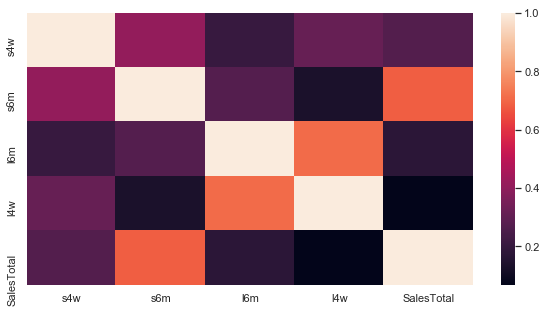

In [68]:
plt.figure(figsize=(10,5))
sns.heatmap(dfnum.corr())

## Correlation Analysis with Cross-Tab (Categorical)

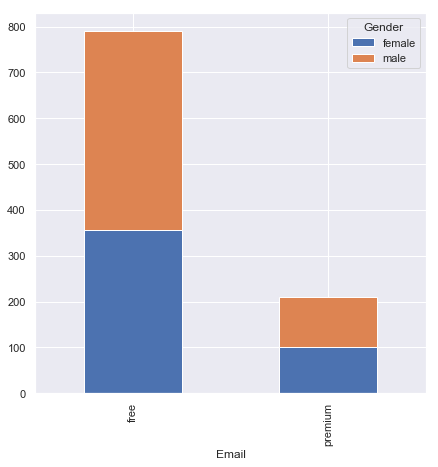

In [83]:
# do cross-tabulation to determine how the string variables are related to each other
# see some online examples in Python to get started
pd.crosstab(df.Email,df.Gender,margins=True)

ct = pd.crosstab(df.Email, df.Gender)

ct.plot.bar(stacked=True)

plt.show()

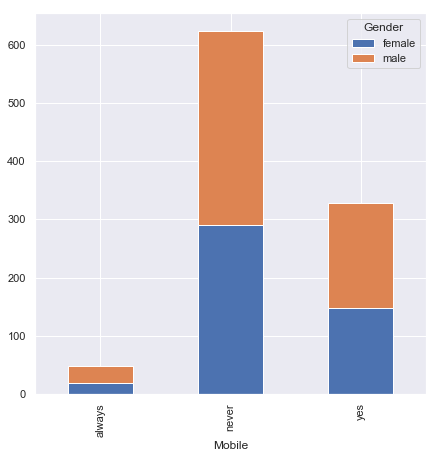

In [84]:
pd.crosstab(df.Mobile,df.Gender,margins=True)

ct = pd.crosstab(df.Mobile, df.Gender)

ct.plot.bar(stacked=True)

plt.show()

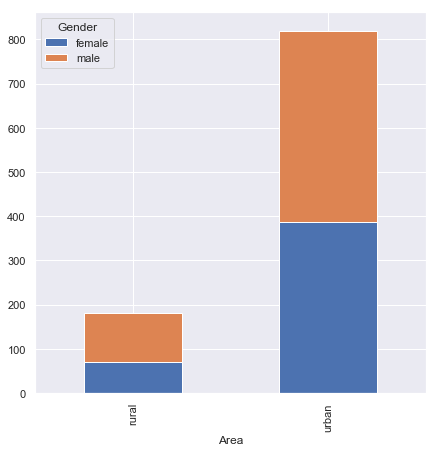

In [85]:
pd.crosstab(df.Area,df.Gender,margins=True)

ct = pd.crosstab(df.Area, df.Gender)

ct.plot.bar(stacked=True)

plt.show()

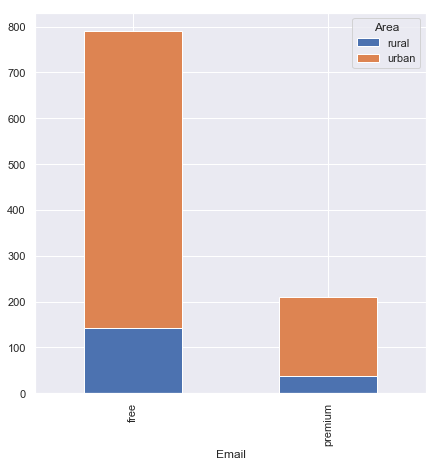

In [86]:
pd.crosstab(df.Email,df.Area,margins=True)

ct = pd.crosstab(df.Email, df.Area)

ct.plot.bar(stacked=True)

plt.show()

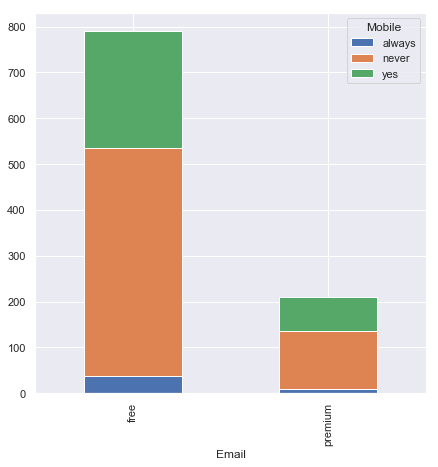

In [87]:
pd.crosstab(df.Email,df.Mobile,margins=True)

ct = pd.crosstab(df.Email, df.Mobile)

ct.plot.bar(stacked=True)

plt.show()

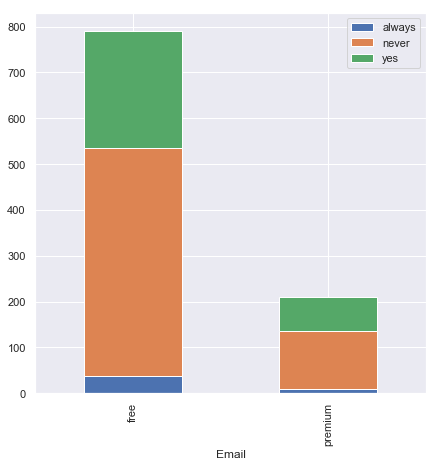

In [88]:
pd.crosstab(df.Email,df.Mobile,margins=True)

ct = pd.crosstab(df.Email, df.Mobile)

ct.plot.bar(stacked=True)
plt.legend()

plt.show()

## Results:

Time series analysis on the dataset was impossible to conduct on this dataset because there were only 7 unique dates and each date contained numerous points.

# Thank You!!